In [1]:
%matplotlib inline

import os

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import utils

In [2]:
def extract_HMXL(ds):
    return ds['HMXL_2'].isel(nlon=897, nlat=142).compute()

# Case 001: should have January through March in the archive with old name, April in the rundir with new name
ds_001 = utils.get_pop_daily_ds(['g.e22.G1850ECO_JRA_HR.TL319_t13.001', 'g.e22.G1850ECO_JRA_HR.TL319_g17.001'])
da_001 = extract_HMXL(ds_001)
print('')

# Case 002: should have January through April in the archive, May is still in the rundir
ds_002 = utils.get_pop_daily_ds('g.e22.G1850ECO_JRA_HR.TL319_t13.002')
da_002 = extract_HMXL(ds_002)
print('')

# Case 003: should have January and February in the archive, March is in the rundir
ds_003 = utils.get_pop_daily_ds('g.e22.G1850ECO_JRA_HR.TL319_t13.003')
da_003 = extract_HMXL(ds_003)

print('')

# Case 004: should have January and February are in the archive
ds_004 = utils.get_pop_daily_ds('g.e22.G1850ECO_JRA_HR.TL319_t13.004')
da_004 = extract_HMXL(ds_004)


Datasets contain a total of 114 days
Last daily average written at midnight on Apr 25

Datasets contain a total of 124 days
Last daily average written at midnight on May 05

Datasets contain a total of 151 days
Last daily average written at midnight on Jun 01

Datasets contain a total of 151 days
Last daily average written at midnight on Jun 01


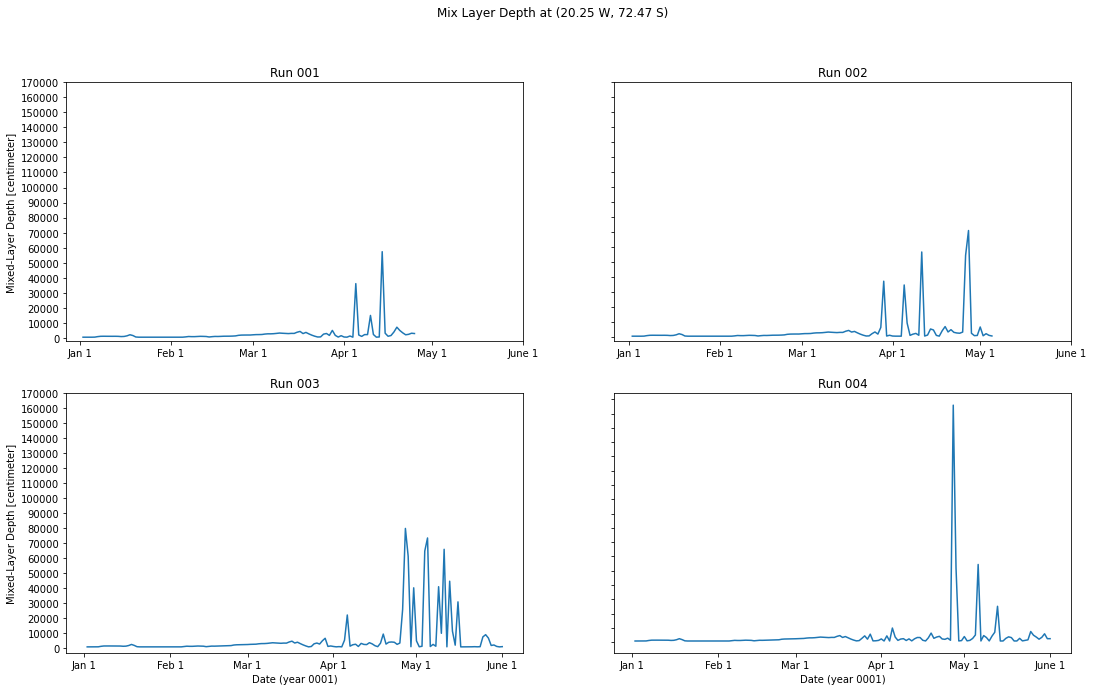

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18.0, 10.5))
xticks = 365 + np.array([0, 31, 59, 90, 120, 151])
xlabels = ['Jan 1', 'Feb 1', 'Mar 1', 'Apr 1', 'May 1', 'June 1']
yticks=np.linspace(0, 17e4, 18)

long_west = 360 - da_001['TLONG'].data
lat_south = -da_001['TLAT'].data
fig.suptitle(f'Mix Layer Depth at ({long_west:.2f} W, {lat_south:.2f} S)')

plt.subplot(221)
da_001.plot()
plt.title('Run 001')
plt.xticks(xticks, xlabels)
plt.xlabel('')
plt.yticks(yticks)

plt.subplot(222)
da_002.plot()
plt.title('Run 002')
plt.xticks(xticks, xlabels)
plt.xlabel('')
plt.yticks(yticks, '')
plt.ylabel('')

plt.subplot(223)
da_003.plot()
plt.title('Run 003')
plt.xticks(xticks, xlabels)
plt.xlabel('Date (year 0001)')
plt.yticks(yticks)

plt.subplot(224)
da_004.plot()
plt.title('Run 004')
plt.xticks(xticks, xlabels)
plt.xlabel('Date (year 0001)')
plt.yticks(yticks, '')
plt.ylabel('')

plt.show()

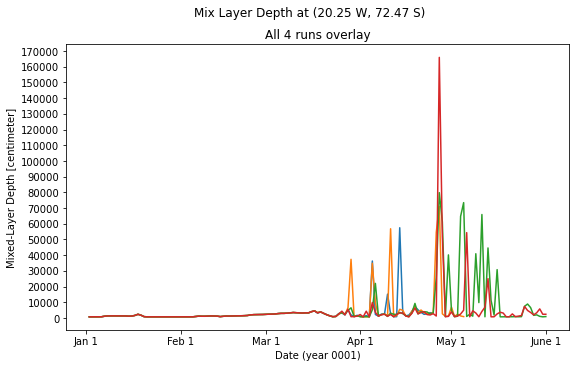

In [4]:
fig = plt.figure(figsize=(9.0, 5.25))
fig.suptitle(f'Mix Layer Depth at ({long_west:.2f} W, {lat_south:.2f} S)')

for da in [da_001, da_002, da_003, da_004]:
    da.plot()
plt.title('All 4 runs overlay')
plt.xticks(xticks, xlabels)
plt.yticks(yticks)
plt.xlabel('Date (year 0001)')
plt.show()